In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('./data/vedio/vedio1.png', cv2.IMREAD_GRAYSCALE)

Text(0.5, 1.0, 'original')

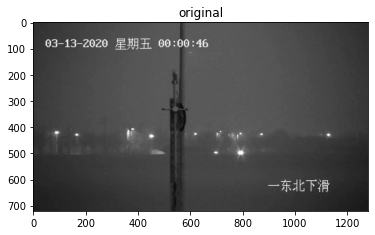

In [3]:
plt.figure()
plt.imshow(img,'gray')
plt.title('original')

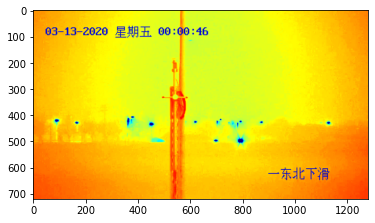

In [4]:
#光谱滤波
colormap = cv2.applyColorMap(img, cv2.COLORMAP_JET)
plt.imshow(colormap)

Text(0.5, 1.0, 'log_fft2')

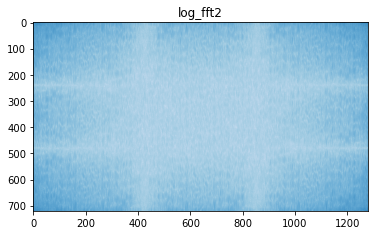

In [5]:
#傅立叶变换对数变换
dft = cv2.dft(np.float32(img), flags = cv2.DFT_COMPLEX_OUTPUT)
fshift = np.fft.fftshift(dft)
log_fft2 = np.log(cv2.magnitude(dft[:,:,0], dft[:,:,1]))
plt.figure()
plt.imshow(log_fft2, 'Blues')
plt.title('log_fft2')

Text(0.5, 1.0, 'log shift spectrum')

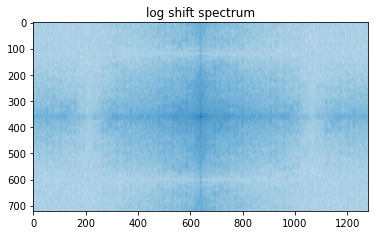

In [6]:
#对中心化后的结果进行对数变换
shift2center = np.fft.fftshift(dft)
log_shift2center = np.log(cv2.magnitude(shift2center[:,:,0], shift2center[:,:,1]))
plt.figure()
plt.imshow(log_shift2center, 'Blues')
plt.title('log shift spectrum')

In [7]:
#设置高通滤波器
width = 30
rows, cols = img.shape
crow,ccol = int(rows/2), int(cols/2) #中心位置
mask = np.ones((rows, cols, 2), np.uint8)
mask[crow-width:crow+width, ccol-width:ccol+width] = 0

Text(0.5, 1.0, 'filter shifted spectrum')

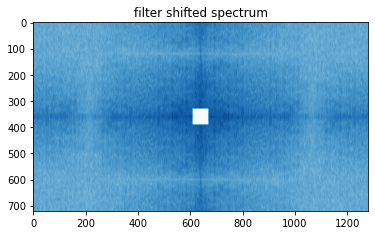

In [8]:
#在频域上显示滤波器位置
mask_img = log_shift2center.copy()
mask_img[crow-width:crow+width, ccol-width:ccol+width] = 0
plt.imshow(mask_img, 'Blues')
plt.title('filter shifted spectrum')

In [9]:
#掩膜图像和频谱图像乘积
f = fshift * mask
#傅里叶逆变换
ishift = np.fft.ifftshift(f)
iimg = cv2.idft(ishift)
res = cv2.magnitude(iimg[:,:,0], iimg[:,:,1])

Text(0.5, 1.0, 'output')

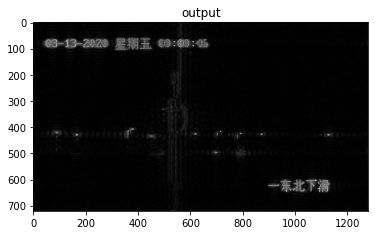

In [10]:
plt.figure()
plt.imshow(res, 'gray')
plt.title('output')